In [47]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.pyplot as plt


### Loading the files to form a data frame



In [4]:
df = pd.read_csv(r'c:/Users/Samarth/Desktop/Iris.csv')

Analysis

In [14]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [64]:
# replacing categorical to numeric values
# Since we wont be using Categorical column to train model we can enoce it in a standard way
df['Species'].replace(df['Species'].unique(),list(range(0,len(df['Species'].unique()))), inplace=True)

### Now we have 4 features in our data.<br> Based on this feature we will cluster data into k points. <br> For this first we need to identify the number of clusters


To find the optimum number of cluster we will plot the elbow curve. <br>
In Elbow curve we basically plot No of Clusters vs Sum of Residuals

In [32]:
from sklearn.cluster import KMeans
X = df.iloc[:,:-1]
K = range(1,10)
Error_Square = []
for i in K:
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(X)
    Error_Square.append(kmeanModel.inertia_)

C:\Users\Samarth\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

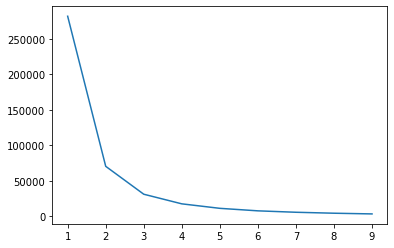

In [35]:
seaborn.lineplot(x=K, y=Error_Square)

Here from the elbow curve we can see that the slope of the curve does not decrease significantly after k=3. <br>
Hence we choose optimum k as k=3

### Comparing actual values and predicted Values

In [41]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

KMeans(n_clusters=3)

Text(0.5, 1.0, 'K_Means')

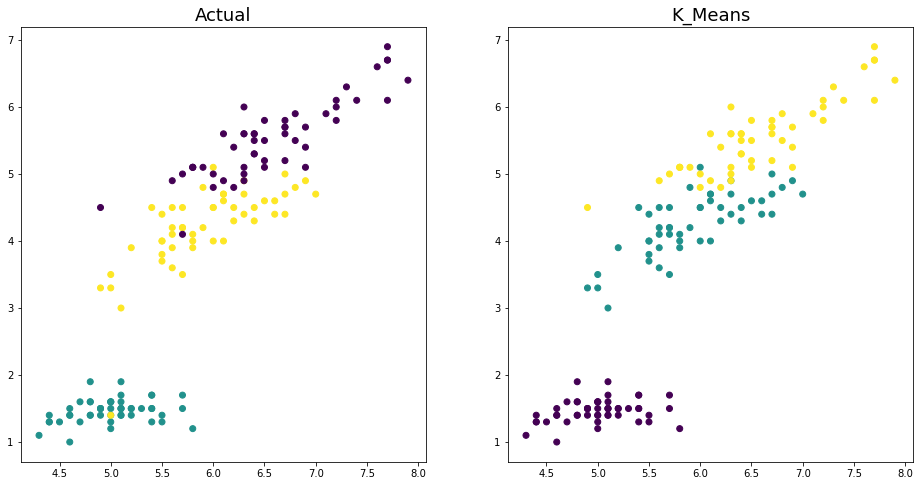

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
df['k-means'] = kmeanModel.predict(X)
axes[0].scatter(df['SepalLengthCm'],df['PetalLengthCm'],c=df['k-means'])
axes[1].scatter(df['SepalLengthCm'],df['PetalLengthCm'],c=df['Species'])
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

As we can see K-Means did a good job in clustering the points correctly